<a href="https://colab.research.google.com/github/youssefhassan369/Applying-Image-Processing-Filters-For-Image-Cartoonifying/blob/main/CV_Assig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [303]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import torch
from tqdm import tqdm

#1)Applying Image Processing Filters For Image Cartoonifying


##Loading Image in grayscale

Downloading...
From: https://drive.google.com/uc?id=1keaopXYzPtK043THz1BV8RN1Algpryn_
To: /content/Original.png
100%|██████████| 112k/112k [00:00<00:00, 33.0MB/s]


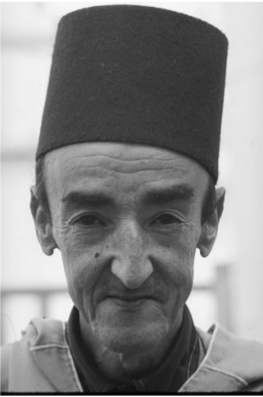

In [304]:
url = 'https://drive.google.com/uc?id=1keaopXYzPtK043THz1BV8RN1Algpryn_'
output = 'Original.png'
gdown.download(url, output, quiet=False)
grayscale=cv2.imread(output,0) #zero for grayscale read mode
cv2_imshow(grayscale)

##Filtering

In [305]:
def median_filter(image,kernal_dim):
            
  
  final=np.zeros([len(image),len(image[0])])
  for i in range(len(image)):   #iterating over rows of image

    for j in range(len(image[0])):  #iterating over columns of image
      x=i-kernal_dim//2
      y=j-kernal_dim//2
      manifest=[]
      for k in range(kernal_dim-1):   #iterating over rows of kernal
        
        for l in range(kernal_dim-1):   #iterating over columns of kernal
         
          if x+k<0 or y+l<0 or x+k>=len(image) or y+l>=len(image[0]):
            manifest.append(0)
          
          else:
            manifest.append(image[x+k][y+l])
          
      manifest.sort()
      final[i][j]=manifest[len(manifest)//2]
  return final


In [306]:
medianed_image=median_filter(grayscale,5)

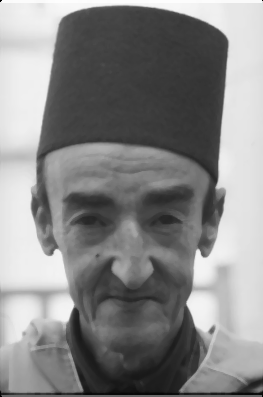

In [307]:
cv2_imshow(medianed_image)

In [308]:
laplaced_image=cv2.Laplacian(medianed_image,cv2.CV_64F, ksize=3)

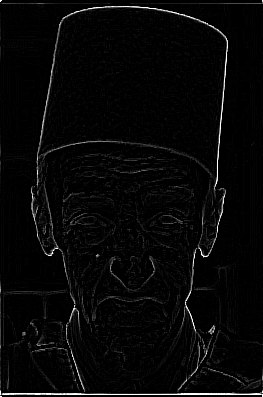

In [309]:
cv2_imshow(laplaced_image)

In [310]:
def show_edges(image):
  final=np.zeros([len(image),len(image[0])])
  for i in range(len(image)):
    for j in range(len(image[0])):
      if image[i][j]<30:
        final[i][j]=255
  return final

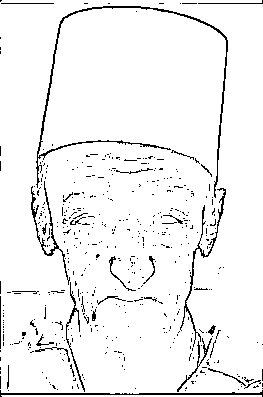

In [311]:
threshold_image=show_edges(laplaced_image)
cv2_imshow(threshold_image)

In [312]:
original=cv2.imread(output) 
bilateraled_image = cv2.bilateralFilter(original.astype('float32'), d=5, sigmaColor=50, sigmaSpace=50)

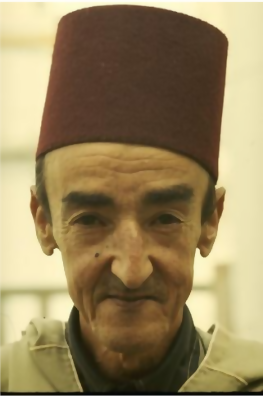

In [313]:
cv2_imshow(bilateraled_image)

In [314]:
def masking(image,edges):
  final=image
  for i in range (len(image)):
    for j in range (len(image[0])):
      if edges[i][j]==0:
        final[i][j]=0
  return final

In [315]:
cartoon=masking(bilateraled_image,threshold_image)

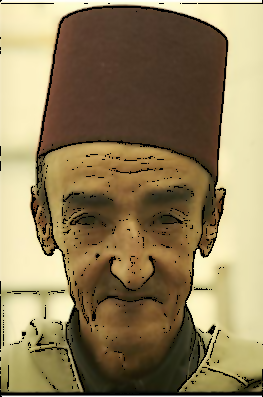

In [316]:
cv2_imshow(cartoon)